## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [9]:
# i will x values equally distributed between 0 and 20
x = np.arange(0,20) 
y = -1 * x + 2

#### Plot your data points. 

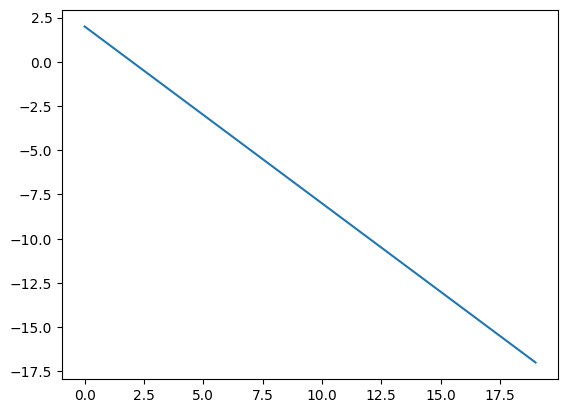

In [10]:
plt.plot(x,y)
plt.show()  

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [11]:
def gradient_descent(X, y, alpha=0.01, iterations=1000, convergence_rate=0.001):
    m = len(y)
    theta_0 = 0  
    theta_1 = 0  
    report = []
    losses = [] 
    theta_0_history = []
    theta_1_history = []

    for i in range(iterations): 
        y_predicted = theta_0 + (theta_1 * X)  
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)  
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        theta_0 = theta_0 - alpha * gradient_theta_0  
        theta_1 = theta_1 - alpha * gradient_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted
        })
        
        if abs(gradient_theta_0) < convergence_rate and abs(gradient_theta_1) < convergence_rate:
            print(f"Converged at iteration {i+1}")
            break
    
    return report,losses,theta_0_history,theta_1_history

In [12]:
report,losses,theta_0_history,theta_1_history = gradient_descent(x, y,iterations=200, alpha=0.0001)

In [13]:
# To access the final values of theta_0 and theta_1
print(f"Final theta_0 value: {report[-1]['Theta_0']}")
print(f"Final theta_1 value: {report[-1]['Theta_1']}")

Final theta_0 value: -0.04847625408693855
Final theta_1 value: -0.7726681291516528


In [14]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9474935630128157 so we have accuracy of 94.75 %


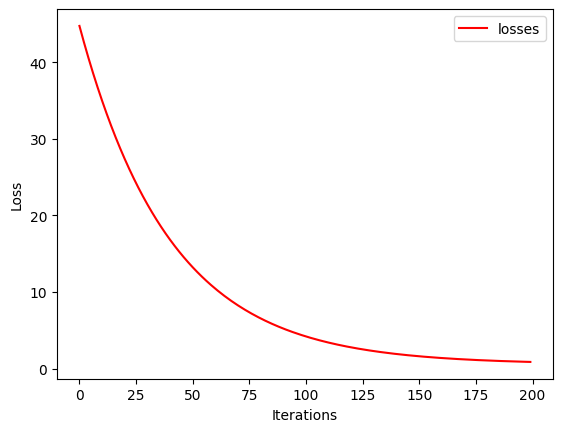

In [15]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
import plotly.graph_objects as go

def plot_3d(x, y, t0, t1, loss):
    fig = go.Figure()

    t0_range = np.linspace(min(t0), max(t0), 100)
    t1_range = np.linspace(min(t1), max(t1), 100)
    T0, T1 = np.meshgrid(t0_range, t1_range)

    # Compute the loss function for the entire meshgrid
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            t0_val = T0[i, j]
            t1_val = T1[i, j]
            Z[i, j] = np.sum((y - (t0_val + t1_val * x)) ** 2) / (2 * len(x))

    fig.add_trace(go.Surface(x=T0, y=T1, z=Z, colorscale='Viridis', opacity=0.7))
    fig.add_trace(go.Scatter3d(x=t0, y=t1, z=loss, mode='lines+markers', 
                               marker=dict(size=5, color='red'), line=dict(color='red', width=2)))

    fig.update_layout(scene=dict(
                        xaxis_title='Theta 0',
                        yaxis_title='Theta 1',
                        zaxis_title='Loss'),
                        title='3D Gradient Descent',
                        autosize=False,
                        width=500, height=500,
                        margin=dict(l=65, r=50, b=65, t=90))

    fig.show()



In [24]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

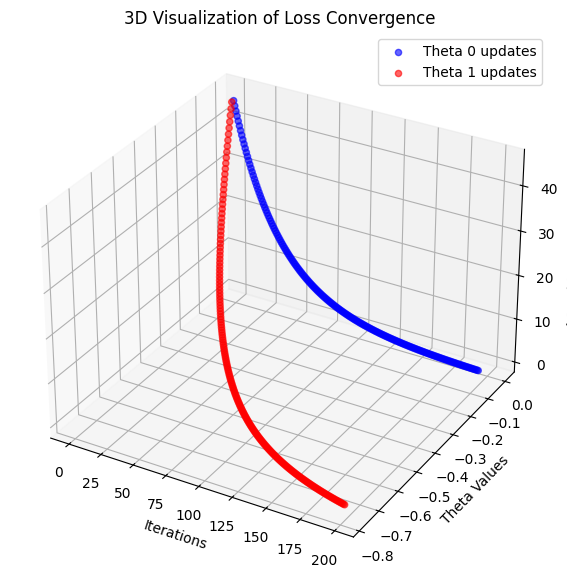

In [25]:
from mpl_toolkits.mplot3d import Axes3D

iterations = np.arange(len(losses))
theta_0_vals = np.array(theta_0_history)
theta_1_vals = np.array(theta_1_history)
loss_vals = np.array(losses)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iterations, theta_0_vals, loss_vals, c='blue', label='Theta 0 updates', alpha=0.6)
ax.scatter(iterations, theta_1_vals, loss_vals, c='red', label='Theta 1 updates', alpha=0.6)

# Labels
ax.set_xlabel("Iterations")
ax.set_ylabel("Theta Values")
ax.set_zlabel("Loss (Cost Function)")
ax.set_title("3D Visualization of Loss Convergence")
ax.legend()

# Show the plot
plt.show()

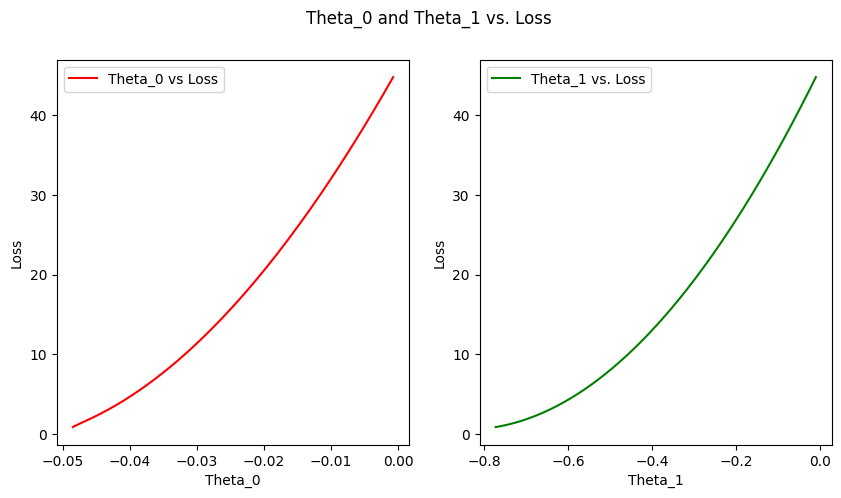

In [26]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

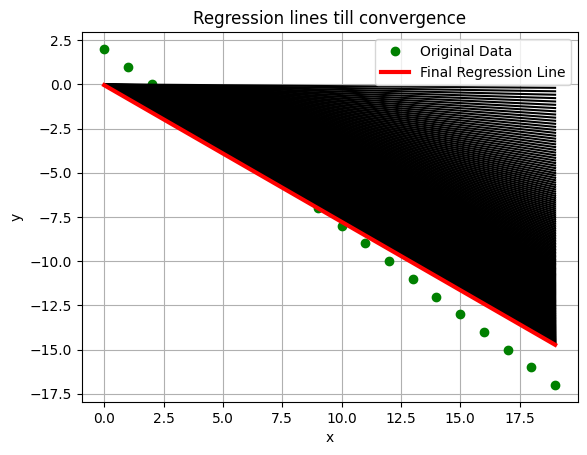

In [27]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

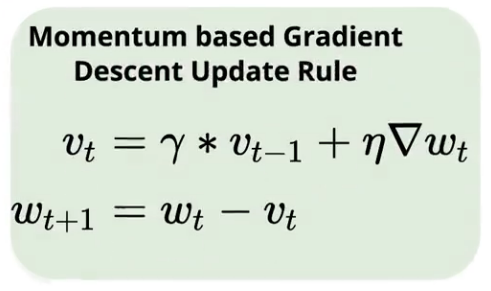

#### γ takes values between 0 and 1.
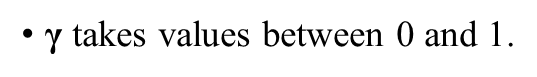

In [28]:
def momentum_gradient_descent(X, y, alpha=0.01, gamma=0.5, iterations=1000, convergence_rate=0.001):
    m = len(y)
    theta_0, theta_1 = 0, 0  
    v_theta_0, v_theta_1 = 0, 0 
    report, losses = [], []
    theta_0_history, theta_1_history = [], []

    for i in range(iterations): 
        y_predicted = theta_0 + theta_1 * X
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        # Update momentum term
        v_theta_0 = gamma * v_theta_0 + alpha * gradient_theta_0
        v_theta_1 = gamma * v_theta_1 + alpha * gradient_theta_1
        
        # Update parameters
        theta_0 -= v_theta_0  
        theta_1 -= v_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Velocity_Theta_0": v_theta_0,
            "Velocity_Theta_1": v_theta_1,
            "Hypothesis": y_predicted   
        })
        
        if abs(v_theta_0) < convergence_rate and abs(v_theta_1) < convergence_rate:
            print(f"Converged at iteration {i+1}")
            break
    
    return report, losses, theta_0_history, theta_1_history

In [29]:
report, losses, theta_0_history, theta_1_history = momentum_gradient_descent(x, y)

Converged at iteration 449


In [30]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9997227149119479 so we have accuracy of 99.97 %


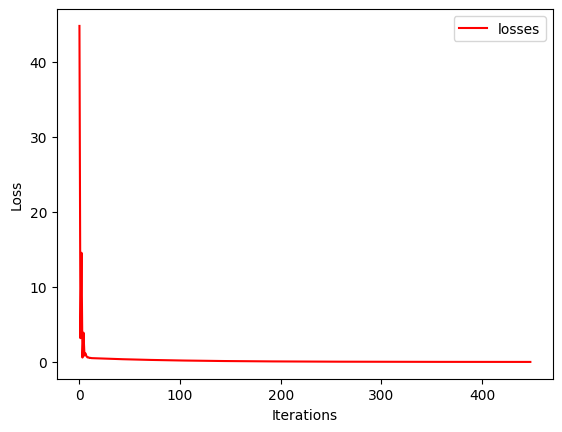

In [220]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

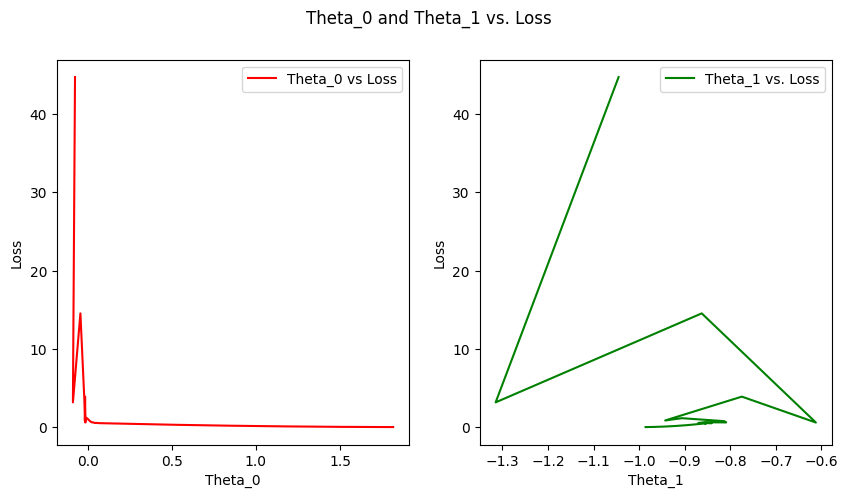

In [32]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

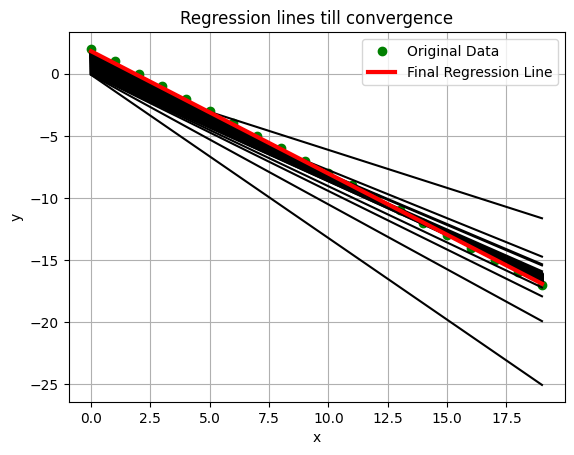

In [33]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [34]:
report, losses, theta_0_history, theta_1_history = momentum_gradient_descent(x, y, gamma=0.1)

Converged at iteration 611


In [35]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9990882529957887 so we have accuracy of 99.91 %


In [37]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

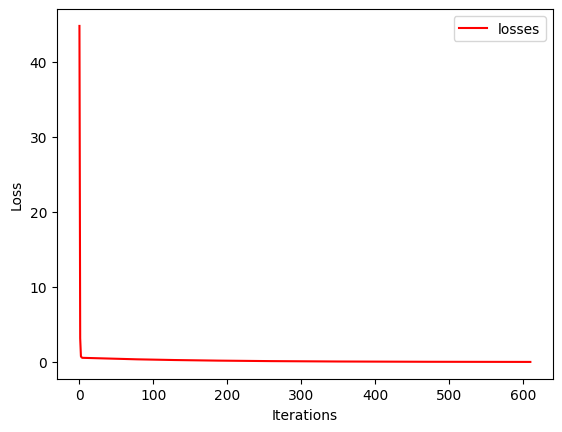

In [38]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

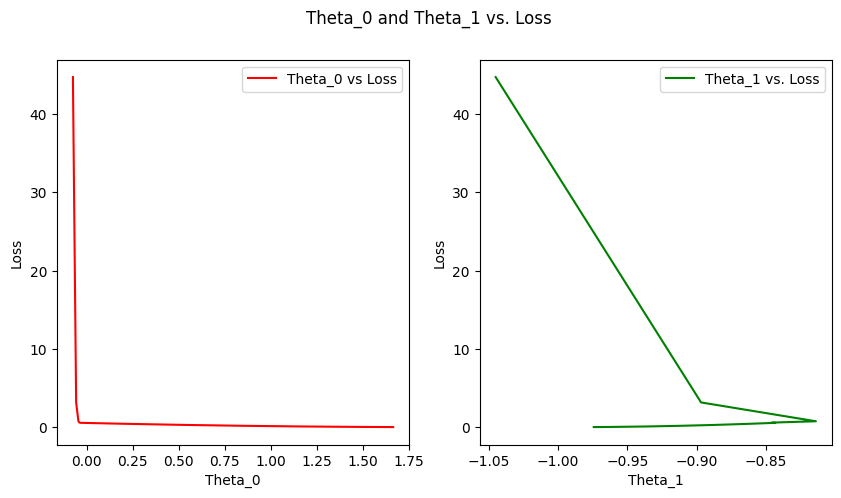

In [39]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

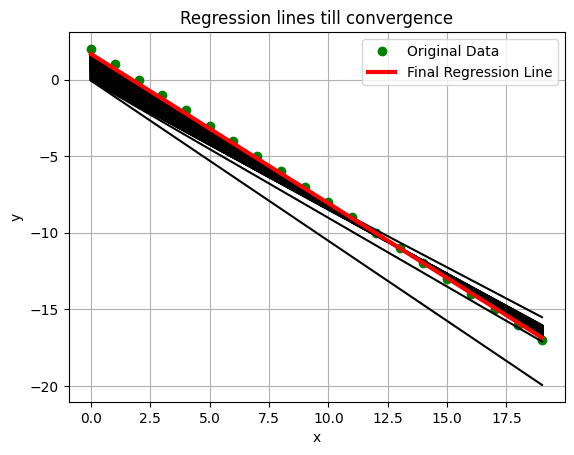

In [40]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [41]:
# for gamma = 0.9
report, losses, theta_0_history, theta_1_history = momentum_gradient_descent(x, y, gamma=0.9)

Converged at iteration 124


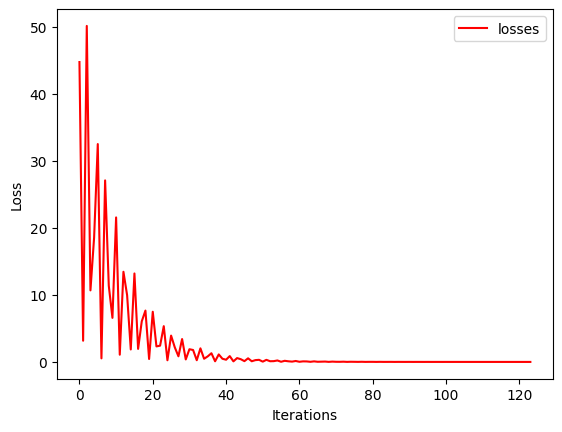

In [42]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

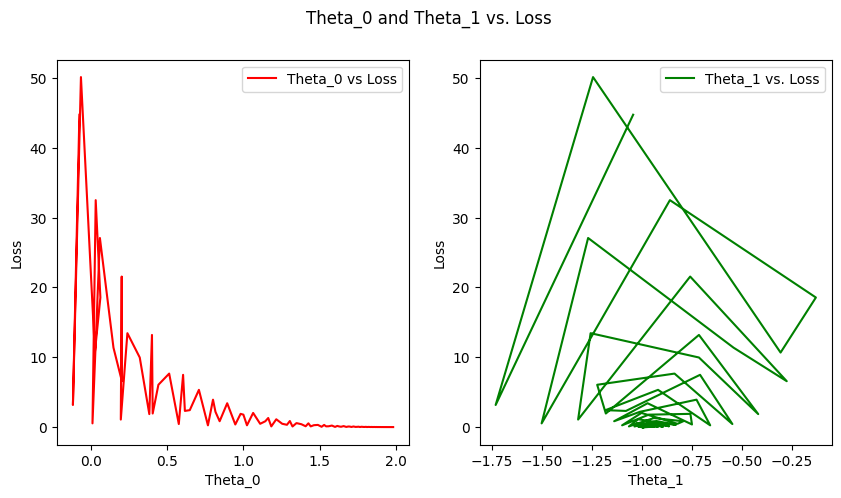

In [44]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

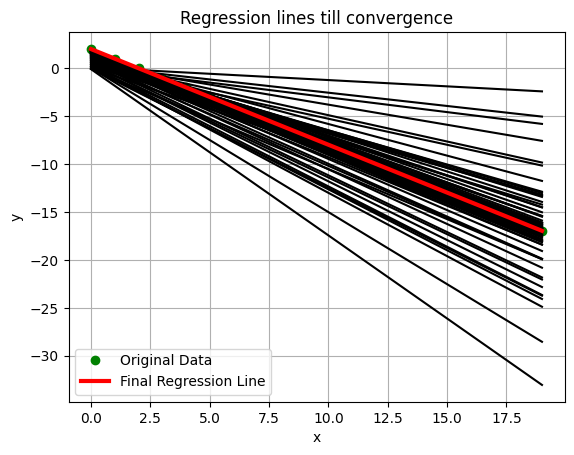

In [45]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be AdaGrad and check your results

In [46]:
def adagrad(X, y, alpha=0.01, epsilon=1e-8, iterations=1000):
    m = len(y)
    theta_0, theta_1 = 0, 0  
    G_theta_0, G_theta_1 = 0, 0  # Accumulated squared gradients
    report, losses = [], []
    theta_0_history, theta_1_history = [], []

    for i in range(iterations): 
        y_predicted = theta_0 + theta_1 * X
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        # Accumulate squared gradients
        G_theta_0 += gradient_theta_0 ** 2
        G_theta_1 += gradient_theta_1 ** 2
        
        # Adagrad update rule
        theta_0 -= (alpha / (np.sqrt(G_theta_0) + epsilon)) * gradient_theta_0
        theta_1 -= (alpha / (np.sqrt(G_theta_1) + epsilon)) * gradient_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted   
        })
    
    return report, losses, theta_0_history, theta_1_history


In [47]:
report, losses, theta_0_history, theta_1_history = adagrad(x, y,iterations=10000)

In [48]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9534410725804591 so we have accuracy of 95.34 %


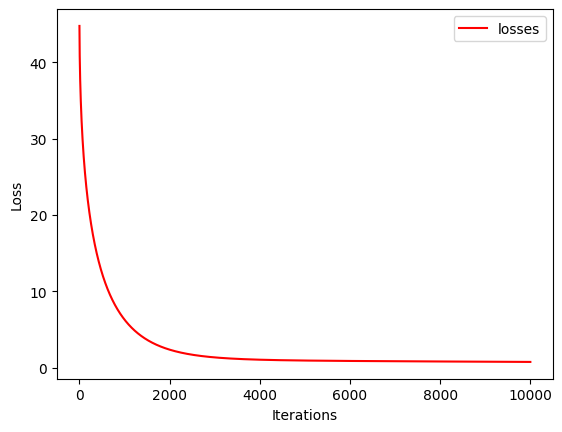

In [235]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

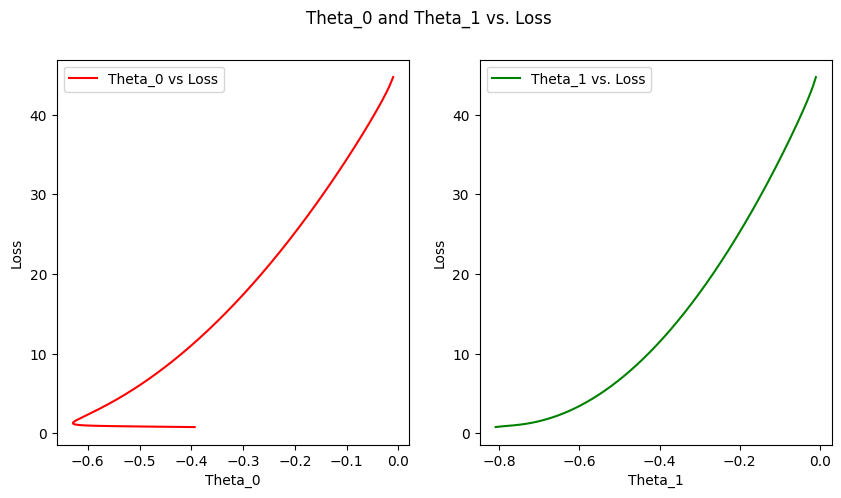

In [50]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

C:\Users\aliay\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



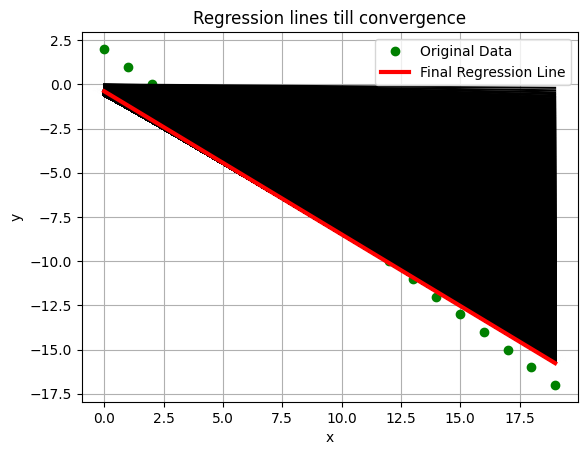

In [51]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be RMSProp and check your results

In [52]:
def rmsprop(X, y, alpha=0.01, gamma=0.9, epsilon=1e-8, iterations=1000):
    m = len(y)
    theta_0, theta_1 = 0, 0  
    E_g2_theta_0, E_g2_theta_1 = 0, 0  # Moving average of squared gradients
    report, losses = [], []
    theta_0_history, theta_1_history = [], []

    for i in range(iterations): 
        y_predicted = theta_0 + theta_1 * X
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)
        losses.append(cost_fun)
        
        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)
        
        # Compute exponentially weighted moving average of squared gradients
        E_g2_theta_0 = gamma * E_g2_theta_0 + (1 - gamma) * (gradient_theta_0 ** 2)
        E_g2_theta_1 = gamma * E_g2_theta_1 + (1 - gamma) * (gradient_theta_1 ** 2)
        
        # Update parameters using RMSprop formula
        theta_0 -= (alpha / (np.sqrt(E_g2_theta_0) + epsilon)) * gradient_theta_0
        theta_1 -= (alpha / (np.sqrt(E_g2_theta_1) + epsilon)) * gradient_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        
        report.append({
            "Iteration": i + 1,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted
        })
    
    return report, losses, theta_0_history, theta_1_history

In [53]:
report, losses, theta_0_history, theta_1_history = rmsprop(x, y)

In [54]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9998921052691729 so we have accuracy of 99.99 %


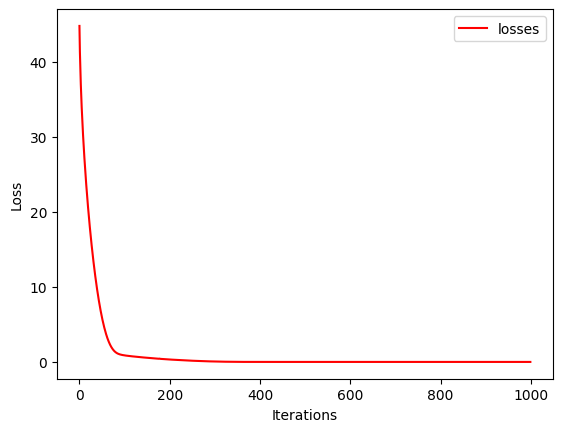

In [241]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

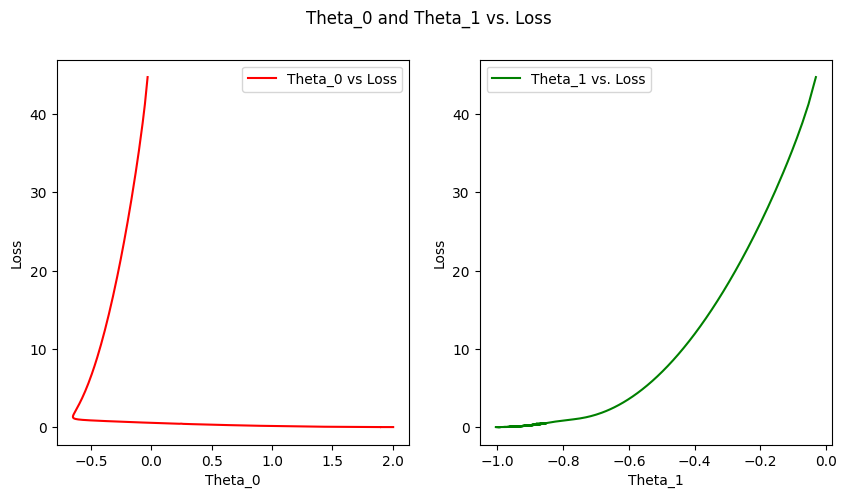

In [56]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

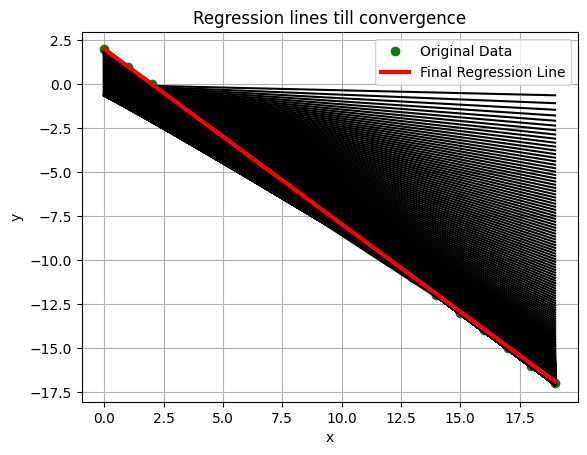

In [57]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Update your Batch GD for one variable  implementation to be ADAM and check your results

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def adam(X, y, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000):
    m = len(y)
    theta_0, theta_1 = 0, 0  
    m_theta_0, m_theta_1 = 0, 0  # First moment estimate
    v_theta_0, v_theta_1 = 0, 0  # Second moment estimate
    report, losses = [], []
    theta_0_history, theta_1_history = [], []

    for t in range(1, iterations + 1):  
        y_predicted = theta_0 + theta_1 * X
        cost_fun = (1 / (2 * m)) * np.sum((y_predicted - y) ** 2)
        losses.append(cost_fun)

        gradient_theta_0 = (1 / m) * np.sum(y_predicted - y)
        gradient_theta_1 = (1 / m) * np.sum((y_predicted - y) * X)

        # update biased first moment
        m_theta_0 = beta1 * m_theta_0 + (1 - beta1) * gradient_theta_0
        m_theta_1 = beta1 * m_theta_1 + (1 - beta1) * gradient_theta_1

        # update biased second moment
        v_theta_0 = beta2 * v_theta_0 + (1 - beta2) * (gradient_theta_0 ** 2)
        v_theta_1 = beta2 * v_theta_1 + (1 - beta2) * (gradient_theta_1 ** 2)

        # Compute bias-corrected first moment estimate
        m_hat_theta_0 = m_theta_0 / (1 - beta1 ** t)
        m_hat_theta_1 = m_theta_1 / (1 - beta1 ** t)

        # Compute bias-corrected second moment estimate
        v_hat_theta_0 = v_theta_0 / (1 - beta2 ** t)
        v_hat_theta_1 = v_theta_1 / (1 - beta2 ** t)

        theta_0 -= (alpha / (np.sqrt(v_hat_theta_0) + epsilon)) * m_hat_theta_0
        theta_1 -= (alpha / (np.sqrt(v_hat_theta_1) + epsilon)) * m_hat_theta_1

        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)

        report.append({
            "Iteration": t,
            "Theta_0": theta_0,
            "Theta_1": theta_1,
            "Loss": cost_fun,
            "Gradient_Theta_0": gradient_theta_0,
            "Gradient_Theta_1": gradient_theta_1,
            "Hypothesis": y_predicted    
        })

    return report, losses, theta_0_history, theta_1_history


In [59]:
report, losses, theta_0_history, theta_1_history = adam(x, y)

In [60]:
y_predicted =  report[-1]['Hypothesis']

from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.9968253422607132 so we have accuracy of 99.68 %


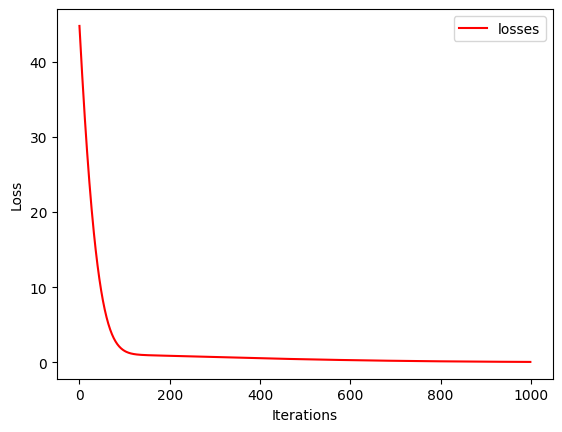

In [61]:
plt.plot(losses,label='losses',color='red')      
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
plot_3d(x, y, theta_0_history, theta_1_history, losses)

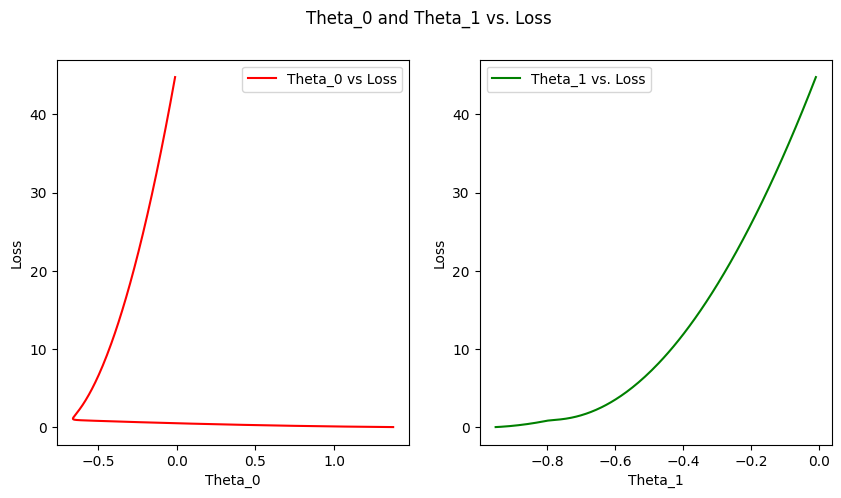

In [63]:
plt.figure(figsize=(10, 5))
plt.suptitle('Theta_0 and Theta_1 vs. Loss ') 

plt.subplot(1, 2, 1)
plt.plot(theta_0_history, losses, label='Theta_0 vs Loss',color='Red')    
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_1_history, losses, label='Theta_1 vs. Loss',color='green')
plt.xlabel('Theta_1')
plt.ylabel('Loss')
plt.legend()

plt.show()

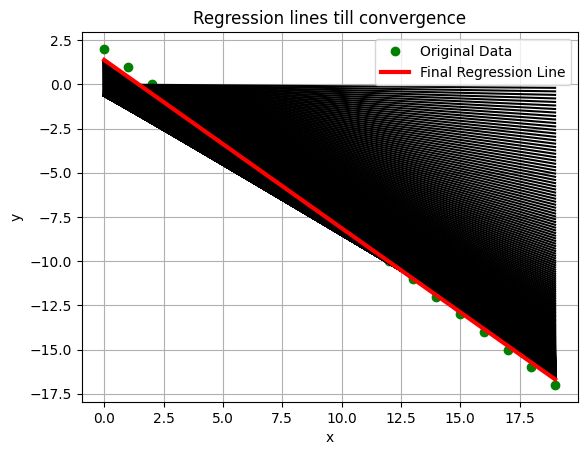

In [64]:
plt.plot(x, y, 'o', label='Original Data',color='green')

for i in range(len(theta_1_history)):  # loop to plot the regression lines
    y_pred = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, y_pred,color='black')

plt.plot(x, y_pred , color='red' , linewidth=3 , label='Final Regression Line')        # for the last regression line

plt.title('Regression lines till convergence')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Congratulations 
